# Students' Performance Analysis 

In [1]:
# Required packages for working with dataframe and visulizing it

import numpy as np 

import matplotlib.pyplot as plt

import pandas as pd 

import seaborn as sns

In [2]:
S1 = pd.read_csv("StudentsPerformance.csv")

**The StudentsPerformance Dataset can be found in Kaggle Website using the following link**
**https://www.kaggle.com/spscientist/students-performance-in-exams**

**This dataset consists of 1000 rows (instances) and 8 columns (variables) including gender, race, parental level of education, lunch, test preparation course, math score and writing score**


In [3]:
S1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
S1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
S1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**We use info() to show a big picture or general information about our dataframe**

**As it can be seen the Dataset does not have any Null value which makes our job easier since we will not be required to clean the dataset**

**Note: The "none" string in "test preparation course" column is not a Null in fact it just shows that the students' parnts do not have any level of education**

**Using describe() provides us with some statistical information about numerical variables in our datframe which we will need them in our analysis**

### Knowing the Type of Variables

**Knowing the type of variables is really important before starting exploring your Dataset because each type of variable requires its own way of visualization**

**There are two main type of variables**


**1) Categorical**


**2) Numerical**

**As it can be seen there are three numeriacl and five categorical variable in this dataset**

### Define our hypothesis 

**A statistical hypothesis is an assumption about a population parameter . This assumption may or may not be true.**

**Null hypothesis: A statistical hypothesis to be tested**

**Alternative hypothesis: The alternative to the null hypothesis.**

**For example we can come up with the following Null and Alternative hypothesis**

**Null 1 : There is no relationship between gender and the exam's score**
**Alt1: The oposite is True**

**Null 2 : There is no relationship between lunch type of students and their exams' scores.
Alt2 : The oposite is true**

**Null 3: There is no relationship between students' parental level of education and their exams' scores.
Alt3: The oposite is true**

**Null 4: There is no relationship between the test preparation course and students' exams' scores.
Alt4: The oppsite is True**



## First Hypothesis

**At first, It is better to plot the histogram of our numerical variables to understand their distribution is Normal, Uniform, Skewed left Skewed right or bimodal**

**One of the best way is using distplot() which gives you the distribution as well as the kde graph**

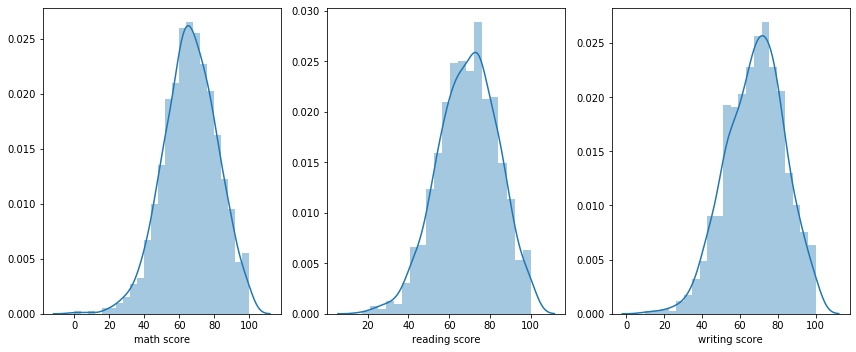

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(S1["math score"])


plt.subplot(1,3,2)
sns.distplot(S1["reading score"])

plt.subplot(1,3,3)
sns.distplot(S1["writing score"])

plt.tight_layout()

**Now we have the histogram of our numerical variables and as you can see all of them have a normal distribution**

**One way to prove this is to check whether the mean, median and mode are equal or not**

In [7]:
print("math score mean",S1["math score"].mean())
print("math score mode",S1["math score"].mode())
print("math score median",S1["math score"].median())
print("\n")

print("reading score mean",S1["reading score"].mean())
print("reading score mode",S1["reading score"].mode())
print("reading score median",S1["reading score"].median())
print("\n")

print("writing score mean",S1["writing score"].mean())
print("writing score mode",S1["writing score"].mode())
print("writing score median",S1["writing score"].median())

math score mean 66.089
math score mode 0    65
dtype: int64
math score median 66.0


reading score mean 69.169
reading score mode 0    72
dtype: int64
reading score median 70.0


writing score mean 68.054
writing score mode 0    74
dtype: int64
writing score median 69.0


**We also can get more detalic information about their distribution using describe() for each column**

In [8]:
S1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**we can answer our hypothesis question using groupby to group the students by gender and then take the mean of each exam based on their gender and evaluate which group is smarter**

In [9]:
S1.groupby("gender")["math score"].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [10]:
S1.groupby("gender")["reading score"].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [11]:
S1.groupby("gender")["writing score"].mean()

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

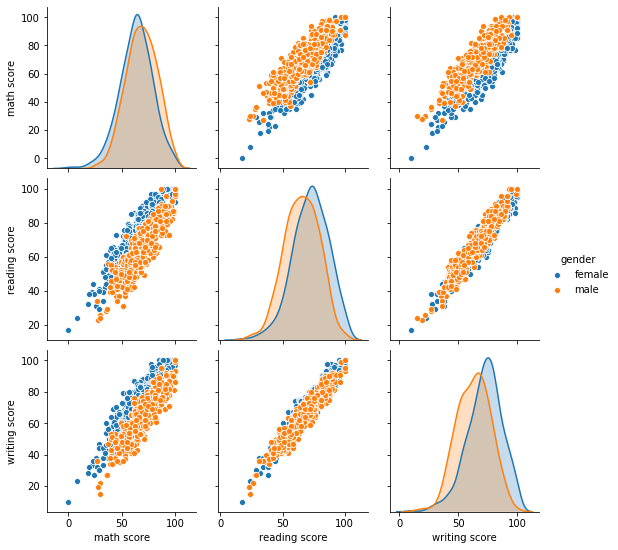

In [12]:
sns.pairplot(S1, hue="gender")

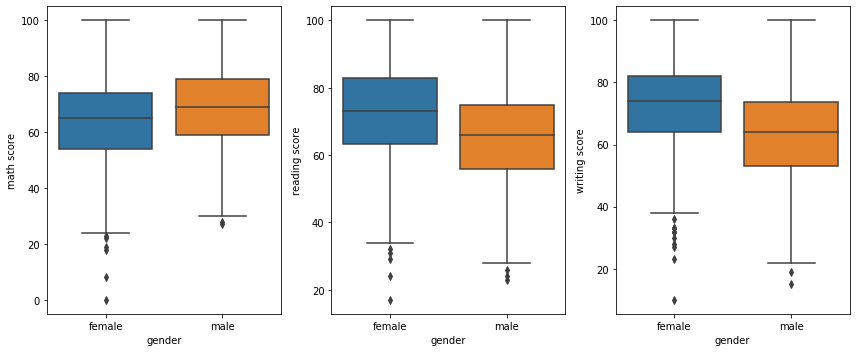

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x="gender",y="math score",data=S1)

plt.subplot(1,3,2)
sns.boxplot(x="gender",y="reading score",data=S1)

plt.subplot(1,3,3)
sns.boxplot(x="gender",y="writing score",data=S1)

plt.tight_layout()

**As it can be seen in the figures above female students seems to get higher mark in reading and writing and male students received higher marks in writing**

**Two questions raises here**

**1) Can we conclude by looking at the means of different exams in our sample test that there is a relationship between gender and test scores?**


**2) The second thing is that we do not know if the number of female and male students equal and our estimation could be true if there are equal number of male and female students participating in the exams**

**3) we do not know if our sample data is a good represent of our population**


**Therefore, what we need here is to find the correlation between gender and their score as well as a hypothesis test to make sure that our population is well supported by the sample data or not**

#### Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.

#### We use hypothesis testing to find if a finding is statistically significant or not

**We should note that our indipendent variable is the gender which is a categorical variable in our sample data. In order to find the correlation we should first of all convert the categorical data to dummy coding**

In [14]:
gender=pd.get_dummies(S1["gender"],drop_first=True)

S2 = pd.concat([S1,gender],axis=1)

S2.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [15]:
S2 = S2.rename(columns={'math score': 'math_score','reading score':'reading_score','writing score' : 'writing_score'})
S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


**To test our hypothesis since we are dealing with a regression problem one of the common methods is Ordinary Least Square method which provides us with the following information** 


**R-squared : The coefficient of determination. A statistical measure of how well the regression line approximates the real data points**

**F-statistic : A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals**

**Prob (F-statistic) : The probability that you would get the above statistic, given the null hypothesis that they are unrelated**

**t : The t-statistic value. This is a measure of how statistically significant the coefficient is.**

**P > |t| : P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.**

In [16]:
import statsmodels.formula.api as sm

gender_statistics = sm.ols(formula="math_score ~ C(male)", data=S2).fit()

print(gender_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.98
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           9.12e-08
Time:                        15:49:36   Log-Likelihood:                -4123.0
No. Observations:                1000   AIC:                             8250.
Df Residuals:                     998   BIC:                             8260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.6332      0.657     96.841   

In [17]:
import statsmodels.formula.api as sm

gender_statistics = sm.ols(formula="reading_score ~ C(male)", data=S2).fit()

print(gender_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     63.35
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.68e-15
Time:                        15:49:36   Log-Likelihood:                -4068.7
No. Observations:                1000   AIC:                             8141.
Df Residuals:                     998   BIC:                             8151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.6081      0.622    116.664   

In [18]:
import statsmodels.formula.api as sm

gender_statistics = sm.ols(formula="writing_score ~ C(male)", data=S2).fit()

print(gender_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     99.59
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.02e-22
Time:                        15:49:36   Log-Likelihood:                -4091.9
No. Observations:                1000   AIC:                             8188.
Df Residuals:                     998   BIC:                             8198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.4672      0.637    113.769   

**By checking the P-value, it is clear that there is statistically significant relationship between gender and all three exam scores**

**It can be seen that female students have stronger skill in doing the courses, which require more reading and writing and on the other hand boys are better in mathematics.**  

## Second Hypothesis

In [19]:
S1.groupby("lunch")["math score"].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math score, dtype: float64

In [20]:
S1.groupby("lunch")["reading score"].mean()

lunch
free/reduced    64.653521
standard        71.654264
Name: reading score, dtype: float64

In [21]:
S1.groupby("lunch")["writing score"].mean()

lunch
free/reduced    63.022535
standard        70.823256
Name: writing score, dtype: float64

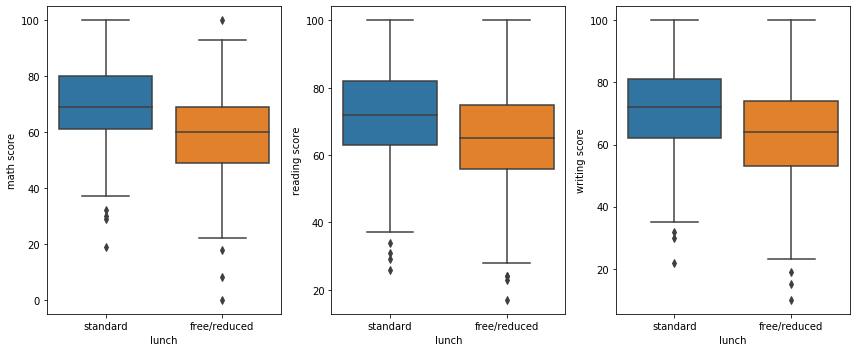

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x="lunch",y="math score",data=S1)

plt.subplot(1,3,2)
sns.boxplot(x="lunch",y="reading score",data=S1)

plt.subplot(1,3,3)
sns.boxplot(x="lunch",y="writing score",data=S1)

plt.tight_layout()

In [23]:
lunch=pd.get_dummies(S2["lunch"],drop_first=True)

S2 = pd.concat([S2,lunch],axis=1)

S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0
4,male,group C,some college,standard,none,76,78,75,1,1


In [24]:
import statsmodels.formula.api as sm

lunch_statistics = sm.ols(formula="math_score ~ C(standard)", data=S2).fit()

print(lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.41e-30
Time:                        15:49:37   Log-Likelihood:                -4071.6
No. Observations:                1000   AIC:                             8147.
Df Residuals:                     998   BIC:                             8157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           58.9211      0.754  

In [25]:

lunch_statistics = sm.ols(formula="reading_score ~ C(standard)", data=S2).fit()

print(lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     55.52
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.00e-13
Time:                        15:49:37   Log-Likelihood:                -4072.4
No. Observations:                1000   AIC:                             8149.
Df Residuals:                     998   BIC:                             8159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           64.6535      0.755  

In [26]:

lunch_statistics = sm.ols(formula="writing_score ~ C(standard)", data=S2).fit()

print(lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     64.16
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.19e-15
Time:                        15:49:37   Log-Likelihood:                -4108.3
No. Observations:                1000   AIC:                             8221.
Df Residuals:                     998   BIC:                             8230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           63.0225      0.782  

**P-Value of all three relationships between lunch and exams' scores is zero, which proves there is a statisticaly significant relationship between these to variables.**

## Third Hypothesis

In [27]:
S1.groupby("parental level of education")["math score"].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [28]:
S1.groupby("parental level of education")["math score"].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [29]:
S1.groupby("parental level of education")["math score"].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

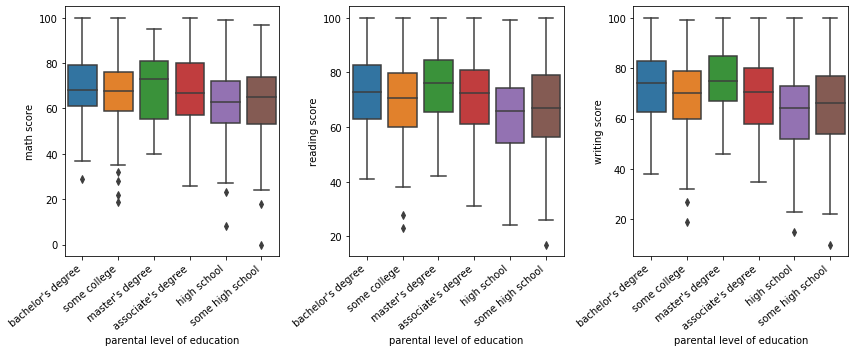

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
ax1 = sns.boxplot(x="parental level of education",y="math score",data=S1)

plt.subplot(1,3,2)
ax2 = sns.boxplot(x="parental level of education",y="reading score",data=S1)

plt.subplot(1,3,3)
ax3 = sns.boxplot(x="parental level of education",y="writing score",data=S1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

In [31]:
parent_edu = pd.get_dummies(S1["parental level of education"],drop_first=True)

parent_edu.head()

,bachelor's degree,high school,master's degree,some college,some high school
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [32]:
S2 = pd.concat([S2,parent_edu],axis=1)

S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard,bachelor's degree,high school,master's degree,some college,some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,1,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,1,0,0,0,1,0


In [33]:
S2 = S2.rename(columns={"bachelor's degree":"bachelor_degree","high school":"high_school","master's degree":"master_degree","some college":"some_college","some high school":"some_high_school"})
S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard,bachelor_degree,high_school,master_degree,some_college,some_high_school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,1,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,1,0,0,0,1,0


In [34]:
import statsmodels.formula.api as sm

parent_edu_statistics= sm.ols(formula="math_score ~ C(bachelor_degree) + C(high_school) + C(master_degree) + C(some_college) + C(some_high_school)", data=S2).fit()

print(parent_edu_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.522
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           5.59e-06
Time:                        15:49:39   Log-Likelihood:                -4121.2
No. Observations:                1000   AIC:                             8254.
Df Residuals:                     994   BIC:                             8284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
import statsmodels.formula.api as sm

parent_edu_statistics = sm.ols(formula="reading_score ~ C(bachelor_degree) + C(high_school) + C(master_degree) + C(some_college) + C(some_high_school)", data=S2).fit()

print(parent_edu_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.289
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.17e-08
Time:                        15:49:39   Log-Likelihood:                -4076.6
No. Observations:                1000   AIC:                             8165.
Df Residuals:                     994   BIC:                             8195.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [36]:
import statsmodels.formula.api as sm

parent_edu_statistics = sm.ols(formula="writing_score ~ C(bachelor_degree) + C(high_school) + C(master_degree) + C(some_college) + C(some_high_school)", data=S2).fit()

print(parent_edu_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.44
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.12e-13
Time:                        15:49:39   Log-Likelihood:                -4104.4
No. Observations:                1000   AIC:                             8221.
Df Residuals:                     994   BIC:                             8250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**By checking the P-Value, It can be found that there is always a statisticaly significant relationship between the education of students' parents when they have high school and some high school degree level and their children math, reading and writing score, but there is just statisticaly significant relationship between the education of students' parents when they have master level and their children writing scores**



## Fourth Hypothesis

In [37]:
S1.groupby("test preparation course")["math score"].mean()

test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

In [38]:
S1.groupby("test preparation course")["reading score"].mean()

test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64

In [39]:
S1.groupby("test preparation course")["writing score"].mean()

test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64

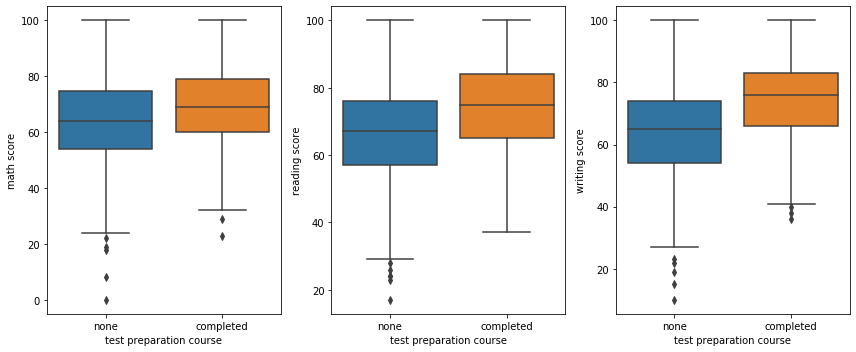

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x="test preparation course",y="math score",data=S1)

plt.subplot(1,3,2)
sns.boxplot(x="test preparation course",y="reading score",data=S1)

plt.subplot(1,3,3)
sns.boxplot(x="test preparation course",y="writing score",data=S1)

plt.tight_layout()

In [41]:
test_pre = pd.get_dummies(S1["test preparation course"],drop_first=True)

S2 = pd.concat([S2,test_pre],axis=1)

S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard,bachelor_degree,high_school,master_degree,some_college,some_high_school,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1,0,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,0,1,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,1,0,0,0,1,0,1


In [42]:
test_pre_statistics = sm.ols(formula="math_score ~ C(none)", data=S2).fit()

print(test_pre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     32.54
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.54e-08
Time:                        15:49:40   Log-Likelihood:                -4121.3
No. Observations:                1000   AIC:                             8247.
Df Residuals:                     998   BIC:                             8256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.6955      0.789     88.330   

In [43]:
test_pre_statistics = sm.ols(formula="reading_score ~ C(none)", data=S2).fit()

print(test_pre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     61.96
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           9.08e-15
Time:                        15:49:40   Log-Likelihood:                -4069.4
No. Observations:                1000   AIC:                             8143.
Df Residuals:                     998   BIC:                             8153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       73.8939      0.749     98.640   

In [44]:
test_pre_statistics = sm.ols(formula="writing_score ~ C(none)", data=S2).fit()

print(test_pre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     108.4
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.69e-24
Time:                        15:49:40   Log-Likelihood:                -4087.9
No. Observations:                1000   AIC:                             8180.
Df Residuals:                     998   BIC:                             8190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       74.4190      0.763     97.515   

**By checking the P-Values, it is clear that there is statisticaly significant relationship between test preparation course and students' exams' scores for all three courses**

### Now that we understood the significance of the relationships between the dataset's variables. It is time to do some further analysis. 

### 1) checking cross-relation of lunch and test preparation on students  exam scores

In [45]:
S1pv_lt=S1.pivot_table(values=["math score","reading score","writing score"],index="lunch", columns="test preparation course")

S1pv_lt

math score            reading score             \
test preparation course  completed       none     completed       none   
lunch                                                                    
free/reduced             63.045802  56.508929     69.870229  61.602679   
standard                 73.533040  68.133971     76.215859  69.177033   

                        writing score             
test preparation course     completed       none  
lunch                                             
free/reduced                70.351145  58.736607  
standard                    76.766520  67.595694

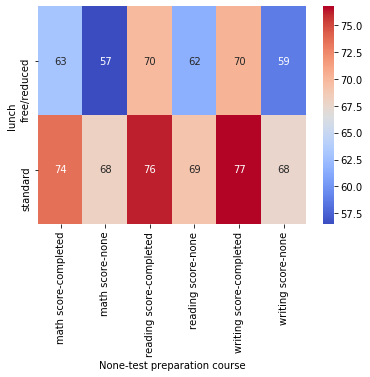

In [46]:
sns.heatmap(S1pv_lt,cmap="coolwarm",annot=True)

**As you can see in the table above, in all three exams those students who did not have a standard lunch received lower scores comparing to those who had a standard lunch. Moreover, completing a test preparation course shows its effects clearly in both groups ( Free lunch , Standard lunch ), in other words, those students who took a test preparation course were more succesful than other students.**

### 2) checking cross-relation of gender and test preparation on students  exam scores

In [47]:
S1pv_gt=S1.pivot_table(values=["math score","reading score","writing score"],index="gender", columns="test preparation course")

S1pv_gt

math score            reading score             \
test preparation course  completed       none     completed       none   
gender                                                                   
female                   67.195652  61.670659     77.375000  69.982036   
male                     72.339080  66.688312     70.212644  62.795455   

                        writing score             
test preparation course     completed       none  
gender                                            
female                      78.793478  68.982036  
male                        69.793103  59.649351

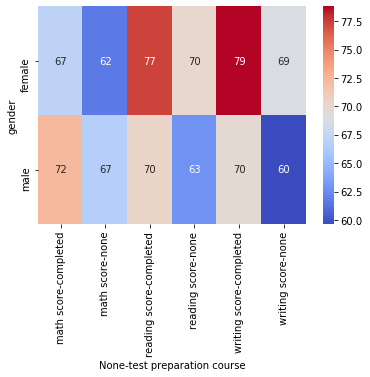

In [48]:
sns.heatmap(S1pv_gt,cmap="coolwarm",annot=True)

**As you can see in the table above, taking a test preparation course increased the students score by 5 to 10 units regardles of their gender. In addition, female students as we discussed earlier had shown better performance in writing and reading courses comparing to male students**

## Further Analysis By grouping students based on their exams score   

### In this step I am going to do more analysis on students whose marks are equal or higher than 70 versus those whose marks are less than 70 in all three exams 

## Marks >= 70

In [49]:
S1_math_high = S1[S1["math score"].apply(lambda x:x>=70)]

S1_math_high.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
25,male,group A,master's degree,free/reduced,none,73,74,72
28,male,group C,high school,standard,none,70,70,65


In [50]:
S1_reading_high = S1_math_high[S1_math_high["reading score"].apply(lambda x:x>=70)]

S1_reading_high.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
25,male,group A,master's degree,free/reduced,none,73,74,72
28,male,group C,high school,standard,none,70,70,65


In [51]:
S1_writing_high = S1_reading_high[S1_reading_high["writing score"].apply(lambda x:x>=70)]

S1_High = S1_writing_high.copy()

S1_High.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
25,male,group A,master's degree,free/reduced,none,73,74,72
34,male,group E,some college,standard,none,97,87,82


In [52]:
S1_High.describe()

,math score,reading score,writing score
count,324.000000,324.000000,324.000000
mean,81.780864,83.765432,83.003086
std,7.809941,7.766757,8.152379
min,70.000000,70.000000,70.000000
25%,75.000000,78.000000,76.000000
50%,81.000000,83.000000,82.000000
75%,87.000000,89.000000,89.000000
max,100.000000,100.000000,100.000000


In [53]:
S1_High["test preparation course"].value_counts()

none         174
completed    150
Name: test preparation course, dtype: int64

**1) Null hypothes: we want to define here is that there is no relationship between gender, test preparation and students who achived 70 or higher in all courses and to reject this hypothesis we should do the following steps**

In [54]:
gender=pd.get_dummies(S1_High["gender"],drop_first=True)

S2_High = pd.concat([S1_High,gender],axis=1)

S2_High.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male
0,female,group B,bachelor's degree,standard,none,72,72,74,0
2,female,group B,master's degree,standard,none,90,95,93,0
4,male,group C,some college,standard,none,76,78,75,1
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,0


In [55]:
test_pre=pd.get_dummies(S1_High["test preparation course"],drop_first=True)

S2_High = pd.concat([S2_High,test_pre],axis=1)

S2_High.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
4,male,group C,some college,standard,none,76,78,75,1,1
5,female,group B,associate's degree,standard,none,71,83,78,0,1
6,female,group B,some college,standard,completed,88,95,92,0,0


In [56]:
S2_High = S2_High.rename(columns={'math score': 'math_score','reading score':'reading_score','writing score' : 'writing_score'})
S2_High.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
4,male,group C,some college,standard,none,76,78,75,1,1
5,female,group B,associate's degree,standard,none,71,83,78,0,1
6,female,group B,some college,standard,completed,88,95,92,0,0


In [57]:
gender_testpre_statistics = sm.ols(formula="math_score ~ C(male) + C(none)", data=S2_High).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     14.97
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           6.09e-07
Time:                        15:49:42   Log-Likelihood:                -1110.7
No. Observations:                 324   AIC:                             2227.
Df Residuals:                     321   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       80.5117      0.749    107.556   

In [58]:
gender_testpre_statistics = sm.ols(formula="reading_score ~ C(male) + C(none)", data=S2_High).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     27.09
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.35e-11
Time:                        15:49:42   Log-Likelihood:                -1098.1
No. Observations:                 324   AIC:                             2202.
Df Residuals:                     321   BIC:                             2214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       87.7561      0.720    121.888   

In [59]:
gender_testpre_statistics = sm.ols(formula="writing_score ~ C(male) + C(none)", data=S2_High).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     57.47
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.64e-22
Time:                        15:49:42   Log-Likelihood:                -1089.5
No. Observations:                 324   AIC:                             2185.
Df Residuals:                     321   BIC:                             2196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       88.8888      0.701    126.790   

**As it can be seen P-Value in all cases are zero fpr gender but it shows that there is statistically significant relationship between test preparation course and writing and reading scores.**

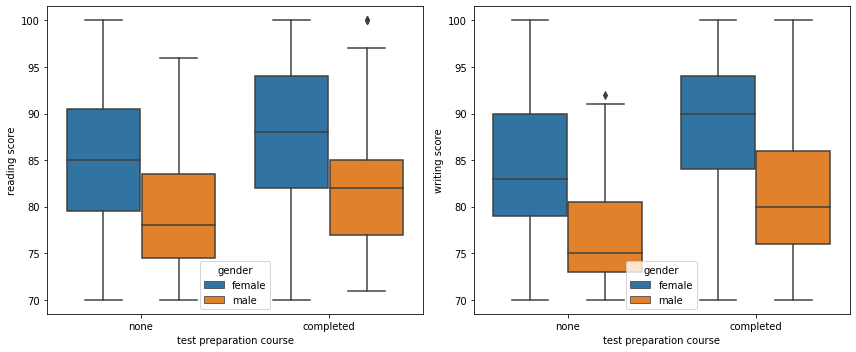

In [60]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="test preparation course",y="reading score",hue="gender",data=S1_High)

plt.subplot(1,2,2)
sns.boxplot(x="test preparation course",y="writing score",hue="gender",data=S1_High)

plt.tight_layout()

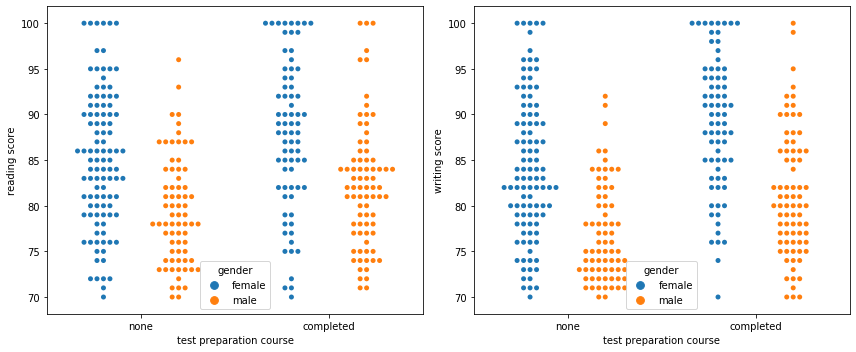

In [61]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.swarmplot(x="test preparation course",y="reading score",data=S1_High,hue="gender",dodge=True)

plt.subplot(1,2,2)
sns.swarmplot(x="test preparation course",y="writing score",data=S1_High,hue="gender",dodge=True)

plt.tight_layout()

**2) Null hypothesis : we want to define here is that there is no relationship between lunch, test preparation and students who achived 70 or higher in all courses, and to reject this hypothesis we should do the following steps**

In [62]:
lunch=pd.get_dummies(S1_High["lunch"],drop_first=True)

S2_High = pd.concat([S2_High,lunch],axis=1)

S2_High.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,none,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1
2,female,group B,master's degree,standard,none,90,95,93,0,1,1
4,male,group C,some college,standard,none,76,78,75,1,1,1
5,female,group B,associate's degree,standard,none,71,83,78,0,1,1
6,female,group B,some college,standard,completed,88,95,92,0,0,1


In [63]:
gender_lunch_statistics = sm.ols(formula="math_score ~ C(male) + C(standard)", data=S2_High).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     22.83
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           5.37e-10
Time:                        15:49:44   Log-Likelihood:                -1103.6
No. Observations:                 324   AIC:                             2213.
Df Residuals:                     321   BIC:                             2225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           76.5746      0.957  

In [64]:
gender_lunch_statistics = sm.ols(formula="reading_score ~ C(male) + C(standard)", data=S2_High).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     20.85
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.07e-09
Time:                        15:49:44   Log-Likelihood:                -1103.6
No. Observations:                 324   AIC:                             2213.
Df Residuals:                     321   BIC:                             2225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           85.8079      0.957  

In [65]:
gender_lunch_statistics = sm.ols(formula="writing_score ~ C(male) + C(standard)", data=S2_High).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     37.96
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.59e-15
Time:                        15:49:44   Log-Likelihood:                -1104.7
No. Observations:                 324   AIC:                             2215.
Df Residuals:                     321   BIC:                             2227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           85.2401      0.960  

**As it can be seen P-Value is zero for both gender and lunch just for math scores.**

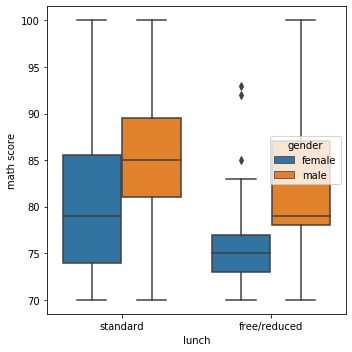

In [66]:
plt.figure(figsize=(5,5))

sns.boxplot(x="lunch",y="math score",hue="gender",data=S1_High)



plt.tight_layout()

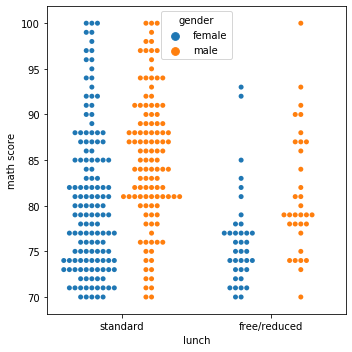

In [67]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="lunch",y="math score",data=S1_High,hue="gender",dodge=True)

plt.tight_layout()

## Marks < 70

In [68]:
S1_math_low = S1[S1["math score"].apply(lambda x:x<70)]

S1_reading_low = S1_math_low[S1_math_low["reading score"].apply(lambda x:x<70)]

S1_writing_low = S1_reading_low[S1_reading_low["reading score"].apply(lambda x:x<70)]

S1_Low = S1_writing_low.copy()

S1_Low.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
14,female,group A,master's degree,standard,none,50,53,58
17,female,group B,some high school,free/reduced,none,18,32,28
18,male,group C,master's degree,free/reduced,completed,46,42,46
19,female,group C,associate's degree,free/reduced,none,54,58,61


In [69]:
S1_Low.describe()

,math score,reading score,writing score
count,427.000000,427.000000,427.000000
mean,53.414520,56.058548,54.948478
std,10.691758,9.410006,10.715360
min,0.000000,17.000000,10.000000
25%,48.000000,51.000000,49.000000
50%,55.000000,58.000000,55.000000
75%,62.000000,63.000000,62.000000
max,69.000000,69.000000,76.000000


In [70]:
S1_Low["test preparation course"].value_counts()

none         323
completed    104
Name: test preparation course, dtype: int64

**3) Null hypothes: we want to define here is that there is no relationship between gender, test preparation and students who achived lower than 70 in all courses and to reject this hypothesis we should do the following steps**

In [71]:
gender=pd.get_dummies(S1_Low["gender"],drop_first=True)

S2_Low = pd.concat([S1_Low,gender],axis=1)

S2_Low.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
7,male,group B,some college,free/reduced,none,40,43,39,1
8,male,group D,high school,free/reduced,completed,64,64,67,1
9,female,group B,high school,free/reduced,none,38,60,50,0
10,male,group C,associate's degree,standard,none,58,54,52,1


In [72]:
test_pre=pd.get_dummies(S1_Low["test preparation course"],drop_first=True)

S2_Low = pd.concat([S2_Low,test_pre],axis=1)

S2_Low.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male,none
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1
7,male,group B,some college,free/reduced,none,40,43,39,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,1,0
9,female,group B,high school,free/reduced,none,38,60,50,0,1
10,male,group C,associate's degree,standard,none,58,54,52,1,1


In [73]:
S2_Low = S2_Low.rename(columns={'math score': 'math_score','reading score':'reading_score','writing score' : 'writing_score'})
S2_Low.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,none
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1
7,male,group B,some college,free/reduced,none,40,43,39,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,1,0
9,female,group B,high school,free/reduced,none,38,60,50,0,1
10,male,group C,associate's degree,standard,none,58,54,52,1,1


In [74]:
gender_testpre_statistics = sm.ols(formula="math_score ~ C(male) + C(none)", data=S2_Low).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     26.76
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.13e-11
Time:                        15:49:45   Log-Likelihood:                -1591.8
No. Observations:                 427   AIC:                             3190.
Df Residuals:                     424   BIC:                             3202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       50.1908      1.145     43.818   

In [75]:
gender_testpre_statistics = sm.ols(formula="reading_score ~ C(male) + C(none)", data=S2_Low).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     11.45
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.43e-05
Time:                        15:49:45   Log-Likelihood:                -1551.4
No. Observations:                 427   AIC:                             3109.
Df Residuals:                     424   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       59.7652      1.042     57.351   

In [76]:
gender_testpre_statistics = sm.ols(formula="writing_score ~ C(male) + C(none)", data=S2_Low).fit()

print(gender_testpre_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     37.16
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.35e-15
Time:                        15:49:46   Log-Likelihood:                -1583.6
No. Observations:                 427   AIC:                             3173.
Df Residuals:                     424   BIC:                             3185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.2419      1.124     56.276   

**As it can be seen P-Value is zero just for the realtionship between gender, test preparation and writing score.**

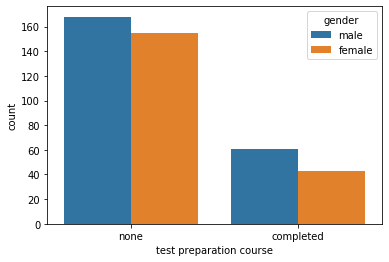

In [77]:
sns.countplot(x="test preparation course",data=S1_Low,hue="gender")

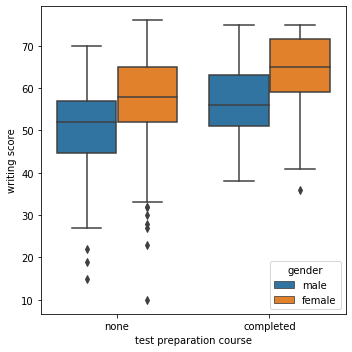

In [78]:
plt.figure(figsize=(5,5))

sns.boxplot(x="test preparation course",y="writing score",hue="gender",data=S1_Low)

plt.tight_layout()

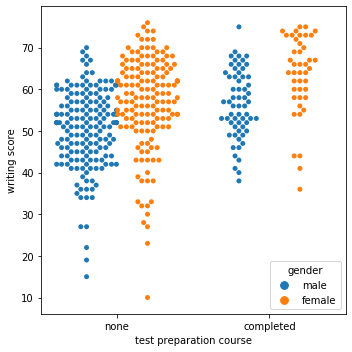

In [79]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="test preparation course",y="writing score",data=S1_Low,hue="gender",dodge=True)

plt.tight_layout()

**4) Null hypothes: we want to define here is that there is no relationship between lunch, test preparation and students who achived 70 or lower in all courses and to reject this hypothesis we should do the following steps**

In [80]:
lunch=pd.get_dummies(S1_Low["lunch"],drop_first=True)

S2_Low = pd.concat([S2_Low,lunch],axis=1)

S2_Low.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,none,standard
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,0
7,male,group B,some college,free/reduced,none,40,43,39,1,1,0
8,male,group D,high school,free/reduced,completed,64,64,67,1,0,0
9,female,group B,high school,free/reduced,none,38,60,50,0,1,0
10,male,group C,associate's degree,standard,none,58,54,52,1,1,1


In [81]:
gender_lunch_statistics = sm.ols(formula="math_score ~ C(male) + C(standard)", data=S2_Low).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     53.60
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.77e-21
Time:                        15:49:47   Log-Likelihood:                -1569.0
No. Observations:                 427   AIC:                             3144.
Df Residuals:                     424   BIC:                             3156.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.3954      0.821  

In [82]:
gender_lunch_statistics = sm.ols(formula="reading_score ~ C(male) + C(standard)", data=S2_Low).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     14.92
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           5.47e-07
Time:                        15:49:47   Log-Likelihood:                -1548.1
No. Observations:                 427   AIC:                             3102.
Df Residuals:                     424   BIC:                             3114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           56.7070      0.782  

In [83]:
gender_lunch_statistics = sm.ols(formula="writing_score ~ C(male) + C(standard)", data=S2_Low).fit()

print(gender_lunch_statistics.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     28.31
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.88e-12
Time:                        15:49:47   Log-Likelihood:                -1591.3
No. Observations:                 427   AIC:                             3189.
Df Residuals:                     424   BIC:                             3201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           56.4157      0.865  

**As it can be seen P-Value in all cases are zero which proves that we have statisticaly siginificant relationship between lunch, teste preperation course and exams' scores among the students who received less than 70 in all their exams.**

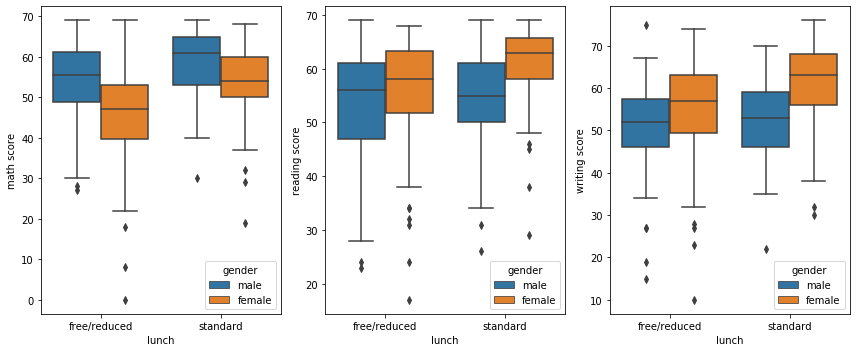

In [84]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x="lunch",y="math score",hue="gender",data=S1_Low)

plt.subplot(1,3,2)
sns.boxplot(x="lunch",y="reading score",hue="gender",data=S1_Low)

plt.subplot(1,3,3)
sns.boxplot(x="lunch",y="writing score",hue="gender",data=S1_Low)

plt.tight_layout()

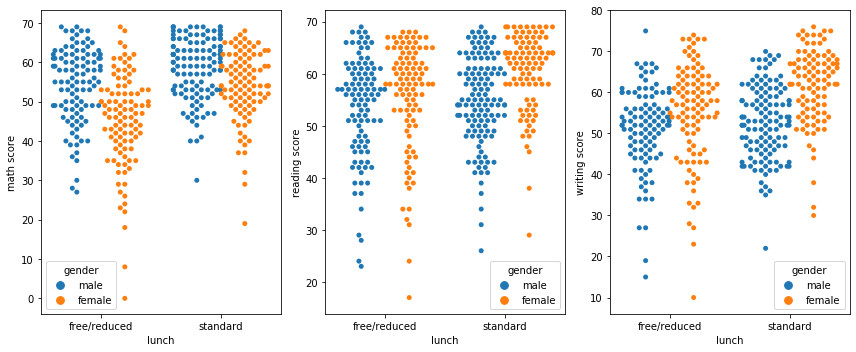

In [85]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.swarmplot(x="lunch",y="math score",data=S1_Low,hue="gender",dodge=True)

plt.subplot(1,3,2)
sns.swarmplot(x="lunch",y="reading score",data=S1_Low,hue="gender",dodge=True)

plt.subplot(1,3,3)
sns.swarmplot(x="lunch",y="writing score",data=S1_Low,hue="gender",dodge=True)

plt.tight_layout()

## Linear Regression

In [86]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [87]:
S2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard,bachelor_degree,high_school,master_degree,some_college,some_high_school,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1,0,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,0,1,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,1,0,0,0,1,0,1


In [88]:
S2.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score', 'male', 'standard', 'bachelor_degree', 'high_school',
       'master_degree', 'some_college', 'some_high_school', 'none'],
      dtype='object')

In [89]:
X = S2[['male', 'standard', 'bachelor_degree', 'high_school',
       'master_degree', 'some_college', 'some_high_school', 'none']]

y = S2[['reading_score']]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
rg = LinearRegression()

In [92]:
rg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
prediction=rg.predict(X_test)

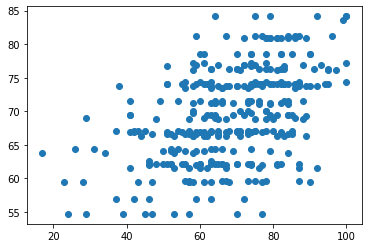

In [94]:
plt.scatter(y_test,prediction)

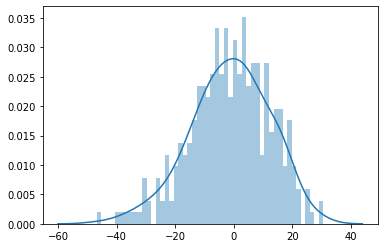

In [95]:
sns.distplot((y_test-prediction),bins=50);

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 10.776384518170968
MSE: 183.94886366873496
RMSE: 13.56277492509313


In [97]:
rg.score(X,y)

0.21052254744339338

In [98]:
X = X = S2[['male', 'standard', 'none']]

y = S2[['reading_score']]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
rg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
prediction=rg.predict(X_test)

Text(0, 0.5, 'prediction reading score')

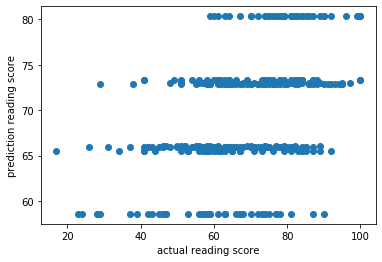

In [102]:
plt.scatter(y_test,prediction)

plt.xlabel("actual reading score")

plt.ylabel("prediction reading score")

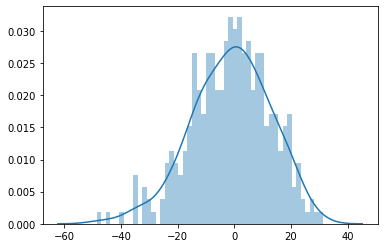

In [103]:
sns.distplot((y_test-prediction),bins=50);

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.023813793353451
MSE: 193.65668307305802
RMSE: 13.91605846039237


In [105]:
rg.score(X,y)

0.17499194417682218

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

### classifying test preparation course based on students' exams scores

In [107]:
X = S2[['math_score', 'reading_score','writing_score']]

y = S2[["test preparation course"]]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
Lg = LogisticRegression()

In [110]:
Lg.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
prediction = Lg.predict(X_test)

In [112]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

   completed       0.69      0.37      0.48       126
        none       0.70      0.90      0.78       204

    accuracy                           0.69       330
   macro avg       0.69      0.63      0.63       330
weighted avg       0.69      0.69      0.67       330



### classifying lunch based on students' exams scores

In [113]:
X = S2[['math_score', 'reading_score','writing_score']]

y = S2[["lunch"]]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [115]:
Lg = LogisticRegression()

In [116]:
Lg.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
prediction = Lg.predict(X_test)

In [118]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

free/reduced       0.70      0.37      0.48       125
    standard       0.70      0.90      0.79       205

    accuracy                           0.70       330
   macro avg       0.70      0.64      0.64       330
weighted avg       0.70      0.70      0.67       330

